# Introduction to DEA High and Low Tide Imagery <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[high_tide_comp_20p](https://explorer.sandbox.dea.ga.gov.au/high_tide_comp_20p), 
[low_tide_comp_20p](https://explorer.sandbox.dea.ga.gov.au/low_tide_comp_20p)


## Background
Intertidal zones are those which are exposed to the air at low tide and underwater at high tide. These include sandy beaches, tidal flats, rocky shores and reefs.

Intertidal zones form critical habitats for a wide range of organisms, but are faced with increasing threats, including coastal erosion and a rise in sea levels.

The ever-changing nature of the tides makes it hard to systematically capture consistent imagery of the intertidal zone, particularly across large regions. Pressure is mounting on this zone from sea-level rise and anthropogenic sources such as land reclamation and aquaculture.

### What this product offers
The [DEA High and Low Tide Imagery product](https://cmi.ga.gov.au/data-products/dea/133/dea-high-and-low-tide-imagery-landsat) is a suite of cloud-free composite imagery of the intertidal zones at high and low tide around the Australian coast. It calculates the geometric median (geomedian) of the highest and lowest 20% of the observed tidal range in Digital Earth Australia (DEA)’s archive of Landsat satellite images.

To generate these composites, the archive of Landsat images has been paired with regional tidal modelling, generated by [Oregon State Tidal Prediction software](http://volkov.oce.orst.edu/tides/otps.html). This allows the archive to be sorted by tide height rather than date, so the intertidal zone can be visualised at any stage of the tide regime.  

The data has been captured on a 25m spatial scale.

### Applications
* Mapping cover types within the intertidal zone
* Visualising the full observed extent of the tidal range around the Australian continental coastline

### Publications
* Sagar, S., Phillips, C., Bala, B., Roberts, D., & Lymburner, L. (2018). [Generating continental scale pixel-based surface reflectance composites in coastal regions with the use of a multi-resolution tidal model](https://www.mdpi.com/2072-4292/10/3/480). Remote Sensing, 10(3), 480.

> **Note:** For more technical information about DEA High and Low Tide Imagery, visit the official [Geoscience Australia DEA High and Low Tide Imagery product description](https://cmi.ga.gov.au/data-products/dea/133/dea-high-and-low-tide-imagery-landsat).

## Description
This notebook will demonstrate how to load data from the DEA High and Low Tide product suite using the Digital Earth Australia datacube. 
Topics covered include:

1. Inspecting the products and measurements available in the datacube
2. Loading low and high tide data for a coastal location
3. Plotting low and high tide data in true and false colour
4. Converting low and high tide data to a remote sensing water index (NDWI), and use this to map wet pixels at low and high tide

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import sys
import datacube
import matplotlib.pyplot as plt

sys.path.append('../Scripts')
from dea_plotting import rgb


### Connect to the datacube

Connect to the datacube so we can access DEA data.

In [2]:
dc = datacube.Datacube(app='DEA_High_and_Low_Tide_Imagery')

## Available products and measurements

### List products
We can use datacube's `list_products` functionality to inspect the DEA High and Low Tide Imagery products that are available in the datacube.
The table below shows the product names that we will use to load the data, a brief description of the data, and its coordinate reference system, spatial resolution and spatial dimensions (i.e. 25 m pixels in the Australian Albers `EPSG:3577` map projection).


In [3]:
# List DEA High and Low Tide Imagery products available in DEA
dc_products = dc.list_products()
display_columns = [
    'name', 'description', 'product_type', 'crs', 'resolution',
    'spatial_dimensions'
]
display(dc_products[dc_products.product_type == 'tidal_composite']
        [display_columns].set_index('name'))

,description,product_type,crs,resolution,spatial_dimensions
name,,,,,
high_tide_comp_20p,High tide 20 percentage composites 25m v. 2.0.0,tidal_composite,EPSG:3577,"(-25, 25)","(y, x)"
low_tide_comp_20p,Low tide 20 percentage composites 25m v. 2.0.0,tidal_composite,EPSG:3577,"(-25, 25)","(y, x)"


### List measurements
We can further inspect the data available for each DEA High and Low Tide Imagery product using datacube's `list_measurements` functionality.
The table below lists each of the measurements available in the data, which represent the different satellite imagery bands (e.g. `red`, `green`, `blue` etc).
These correspond to bands in the original Landsat satellite imagery.

The table also provides information about the measurement data types, units, nodata value and other technical information about each measurement.

In [4]:
dc_measurements = dc.list_measurements()
dc_measurements.loc['high_tide_comp_20p']

,name,dtype,units,nodata,aliases,flags_definition,spectral_definition
measurement,,,,,,,
blue,blue,float32,metres,-999,NaN,NaN,NaN
green,green,float32,metres,-999,NaN,NaN,NaN
red,red,float32,metres,-999,NaN,NaN,NaN
nir,nir,float32,metres,-999,NaN,NaN,NaN
swir1,swir1,float32,metres,-999,NaN,NaN,NaN
swir2,swir2,float32,metres,-999,NaN,NaN,NaN


## Loading data
Now that we know what products and measurements are available for the products, we can load data from the datacube for an example location:

In [5]:
# Set up a region to load low and high tide data
query = {
    'x': (-1041555.354316434, -1025555.354316434),
    'y': (-1992666.5901746228, -1976666.5901746228),
    'crs': 'EPSG:3577'
}

# Load low and high tide data from the datacube
low_tide_ds = dc.load(
    product='low_tide_comp_20p',
    measurements=['red', 'green', 'blue', 'nir', 'swir1', 'swir2'],
    **query)
high_tide_ds = dc.load(
    product='high_tide_comp_20p',
    measurements=['red', 'green', 'blue', 'nir', 'swir1', 'swir2'],
    **query)

We can now view the data that we loaded.
The satellite bands listed under `Data variables` should match the measurements displayed in the previous [List measurements](#List-measurements) step.

In [6]:
low_tide_ds

<xarray.Dataset>
Dimensions:      (time: 1, x: 641, y: 641)
Coordinates:
  * time         (time) datetime64[ns] 2008-06-01
  * y            (y) float64 -1.977e+06 -1.977e+06 ... -1.993e+06 -1.993e+06
  * x            (x) float64 -1.042e+06 -1.042e+06 ... -1.026e+06 -1.026e+06
    spatial_ref  int32 3577
Data variables:
    red          (time, y, x) float32 0.04964104 0.049942903 ... 0.11672047
    green        (time, y, x) float32 0.13809542 0.13810375 ... 0.07829063
    blue         (time, y, x) float32 0.142985 0.14270617 ... 0.051898982
    nir          (time, y, x) float32 0.019549698 0.019038271 ... 0.21109466
    swir1        (time, y, x) float32 0.014030585 0.013525395 ... 0.3071515
    swir2        (time, y, x) float32 0.012055442 0.011902479 ... 0.22296384
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Plotting data
We can plot the data using the `rgb` function to view the loaded low and high tide imagery. 
By plotting the `['red', 'green', 'blue']` bands, we can view the imagery in true colour:

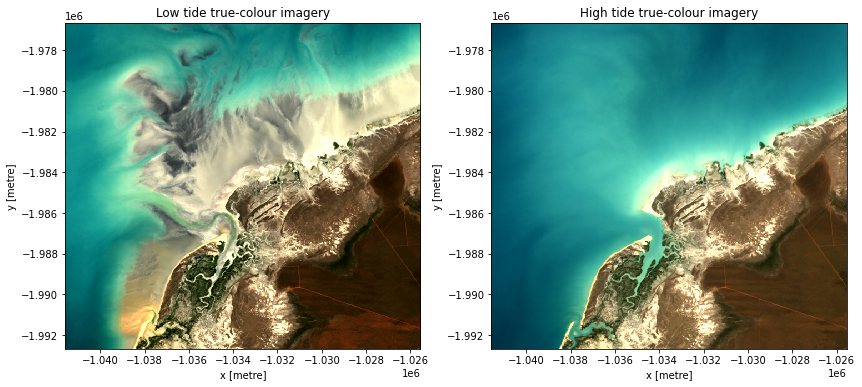

In [7]:
# Plot low and high tide imagery side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
rgb(low_tide_ds, bands=['red', 'green', 'blue'], ax=axes[0])
rgb(high_tide_ds, bands=['red', 'green', 'blue'], ax=axes[1])
axes[0].title.set_text('Low tide true-colour imagery')
axes[1].title.set_text('High tide true-colour imagery')

By plotting the `['swir1', 'nir', 'green']` bands, we can view the imagery in false colour.
This view emphasises the changing position of the land-water boundary between low and high tide.

> **Note:** For more information about plotting satellite imagery in true and false colour, refer to the [Introduction to Plotting notebook](../Beginners_guide/05_Plotting.ipynb).

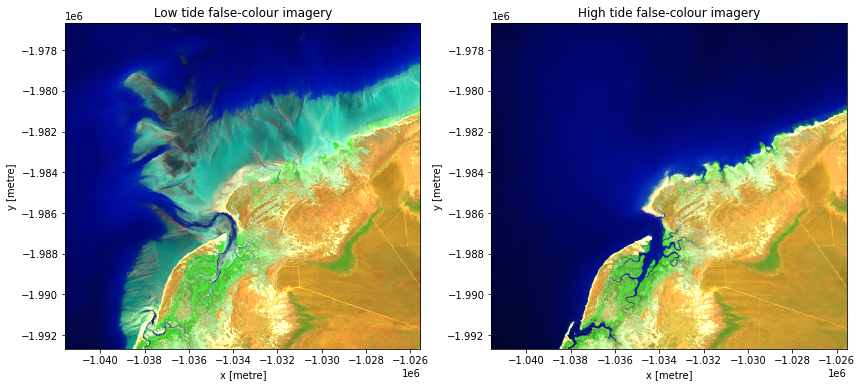

In [8]:
# Plot low and high tide imagery side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
rgb(low_tide_ds, bands=['swir1', 'nir', 'green'], ax=axes[0])
rgb(high_tide_ds, bands=['swir1', 'nir', 'green'], ax=axes[1])
axes[0].title.set_text('Low tide false-colour imagery')
axes[1].title.set_text('High tide false-colour imagery')

## Example application

### Computing remote sensing indices on low and high tide imagery

Because the DEA High and Low Tide Imagery data was produced using a geomedian approach that preserves the band relationships within the modelled spectra at each pixel, the surface reflectance values can be used for remote sensing applications (for example, image classification, remote sensing index calculation, habitat mapping) in exactly the same way as spectral bands from individual Landsat observations.

For example, we can use the data to compute simple remote sensing indices such as the Normalized Difference Water Index (NDWI). 
This index will have high values where a pixel is likely to be open water (e.g. NDWI > 0, or blue colours below):

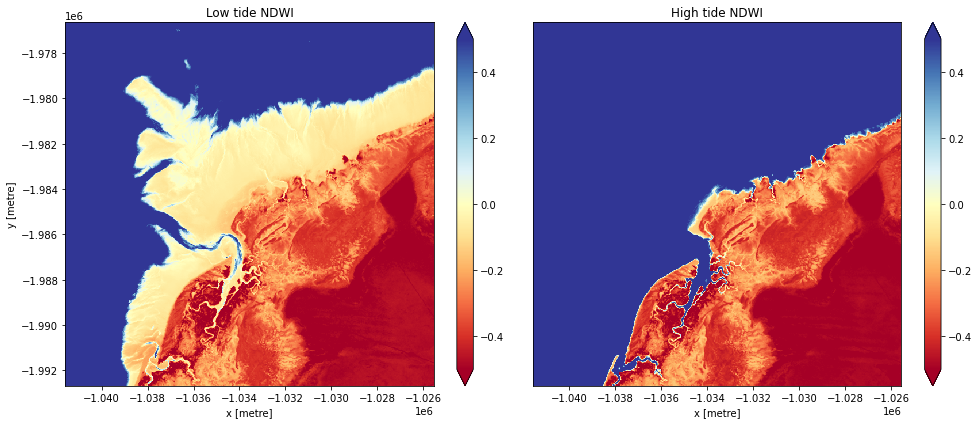

In [9]:
# Compute NDWI using the formula (green - nir) / (green + nir)
high_tide_ndwi = (high_tide_ds.green - high_tide_ds.nir) / \
                 (high_tide_ds.green + high_tide_ds.nir)
low_tide_ndwi = (low_tide_ds.green - low_tide_ds.nir) / \
                (low_tide_ds.green + low_tide_ds.nir)

# Plot high and low tide NDWI side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
low_tide_ndwi.plot(ax=axes[0], vmin=-0.5, vmax=0.5, cmap='RdYlBu')
high_tide_ndwi.plot(ax=axes[1], vmin=-0.5, vmax=0.5, cmap='RdYlBu')
axes[0].title.set_text('Low tide NDWI')
axes[1].title.set_text('High tide NDWI')
axes[1].get_yaxis().set_visible(False)
fig.tight_layout()

A possible application of this may be to map the distribution of water at low and high tide using a NDWI threshold:

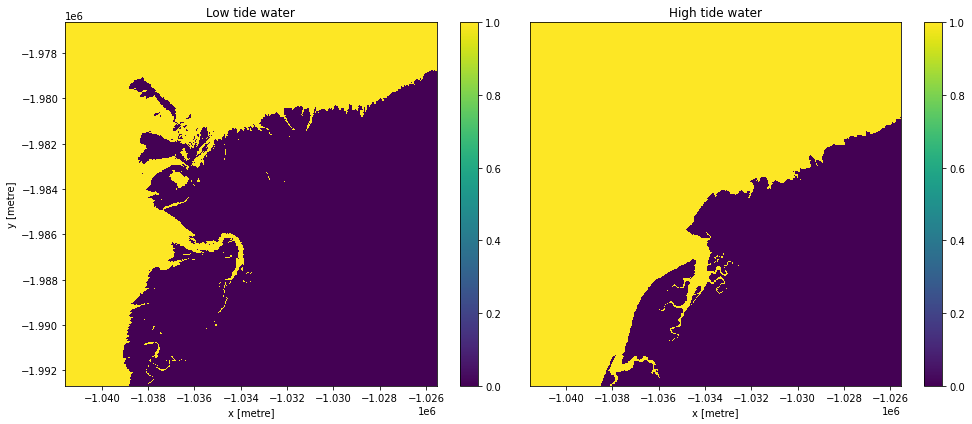

In [10]:
# Identify water pixels using an example threshold value of 0
high_tide_water = high_tide_ndwi > 0
low_tide_water = low_tide_ndwi > 0

# Plot distribution of water at high and low tide
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
low_tide_water.plot(ax=axes[0])
high_tide_water.plot(ax=axes[1])
axes[0].title.set_text('Low tide water')
axes[1].title.set_text('High tide water')
axes[1].get_yaxis().set_visible(False)
fig.tight_layout()

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** October 2020

**Compatible datacube version:** 

In [11]:
print(datacube.__version__)

1.8.3


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)